# Structured and time series data

In [1]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)


In [2]:
%matplotlib inline%reload_ext autoreload
%autoreload 2

UsageError: unrecognized arguments: autoreload


In [3]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/smartmeters/'

## Create datasets

In [4]:
file='weather_daily_darksky.csv'
df_weather_daily=pd.read_csv(PATH+file)


In [5]:
df_weather_daily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,15.57,11/1/2011 15:00,208,partly-cloudy-day,10.13,11/1/2011 22:00,0.36,2.45,1009.46,11/1/2011 22:00,...,15.57,11/1/2011 6:54,11/1/2011 15:00,11/1/2011 10:00,Partly cloudy until evening.,11/2/2011 3:00,9.01,11/1/2011 15:00,11/2/2011 3:00,0.21
1,15.19,11/2/2011 23:00,134,partly-cloudy-night,10.23,11/2/2011 3:00,0.39,4.39,1004.79,11/2/2011 3:00,...,15.06,11/2/2011 6:56,11/2/2011 13:00,11/2/2011 9:00,Partly cloudy throughout the day.,11/2/2011 19:00,7.33,11/2/2011 23:00,11/2/2011 19:00,0.24
2,17.41,11/3/2011 14:00,154,partly-cloudy-day,13.39,11/3/2011 21:00,0.52,3.99,993.40,11/3/2011 21:00,...,17.41,11/3/2011 6:58,11/3/2011 14:00,11/3/2011 10:00,Partly cloudy throughout the day.,11/4/2011 7:00,12.79,11/3/2011 14:00,11/4/2011 7:00,0.27
3,15.54,11/4/2011 11:00,179,fog,12.03,11/4/2011 23:00,0.50,2.62,995.54,11/4/2011 23:00,...,15.54,11/4/2011 6:59,11/4/2011 11:00,11/4/2011 10:00,Foggy overnight.,11/5/2011 2:00,11.53,11/4/2011 11:00,11/5/2011 2:00,0.31
4,13.94,11/5/2011 15:00,346,fog,10.96,11/5/2011 2:00,0.65,2.70,1007.39,11/5/2011 2:00,...,13.94,11/5/2011 7:01,11/5/2011 15:00,11/5/2011 10:00,Foggy in the morning.,11/6/2011 5:00,10.17,11/5/2011 15:00,11/6/2011 6:00,0.34


In [6]:
df_weather_daily["time"]=pd.to_datetime(df_weather_daily["time"])
df_weather_daily=df_weather_daily.sort_values(["time"])
#df_weather_daily.columns

In [7]:
df_weather_daily["day"]=df_weather_daily.apply(lambda row:row["time"].strftime("%Y-%m-%d"),axis=1)
df_weather_daily.columns

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'day'],
      dtype='object')

In [8]:
df_weather_daily["temperatureMean"]=df_weather_daily.apply(lambda row:(row["temperatureMax"]+row["temperatureMin"])/2,axis=1)
df_weather_daily=df_weather_daily.drop_duplicates(["day"])
#df_weather_daily=df_weather_daily.set_index(("day"))
df_weather_daily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,day,temperatureMean
0,15.57,11/1/2011 15:00,208,partly-cloudy-day,10.13,11/1/2011 22:00,0.36,2.45,1009.46,11/1/2011 22:00,...,11/1/2011 15:00,11/1/2011 10:00,Partly cloudy until evening.,11/2/2011 3:00,9.01,11/1/2011 15:00,11/2/2011 3:00,0.21,2011-11-01,12.625
1,15.19,11/2/2011 23:00,134,partly-cloudy-night,10.23,11/2/2011 3:00,0.39,4.39,1004.79,11/2/2011 3:00,...,11/2/2011 13:00,11/2/2011 9:00,Partly cloudy throughout the day.,11/2/2011 19:00,7.33,11/2/2011 23:00,11/2/2011 19:00,0.24,2011-11-02,12.035
2,17.41,11/3/2011 14:00,154,partly-cloudy-day,13.39,11/3/2011 21:00,0.52,3.99,993.40,11/3/2011 21:00,...,11/3/2011 14:00,11/3/2011 10:00,Partly cloudy throughout the day.,11/4/2011 7:00,12.79,11/3/2011 14:00,11/4/2011 7:00,0.27,2011-11-03,15.100
3,15.54,11/4/2011 11:00,179,fog,12.03,11/4/2011 23:00,0.50,2.62,995.54,11/4/2011 23:00,...,11/4/2011 11:00,11/4/2011 10:00,Foggy overnight.,11/5/2011 2:00,11.53,11/4/2011 11:00,11/5/2011 2:00,0.31,2011-11-04,13.535
4,13.94,11/5/2011 15:00,346,fog,10.96,11/5/2011 2:00,0.65,2.70,1007.39,11/5/2011 2:00,...,11/5/2011 15:00,11/5/2011 10:00,Foggy in the morning.,11/6/2011 5:00,10.17,11/5/2011 15:00,11/6/2011 6:00,0.34,2011-11-05,12.055


In [9]:
df_weather_daily.temperatureMax.count()

879

In [11]:
file='block_0.csv'
PATH_block_hh='data/smartmeters//hhblock_dataset/hhblock_dataset/'
block_hh=pd.read_csv(PATH_block_hh+file)

PATH_block_daily='data/smartmeters//daily_dataset/daily_dataset/'
block_daily_1  = pd.read_csv(PATH_block_daily+file)

In [291]:
#files= ['block_0.csv','block_1.csv']
#blocks=[]
#PATH_block_daily='data/smartmeters//daily_dataset/daily_dataset/'
#for f in files: 
#    blocks.append(pd.read_csv(PATH_block_daily+f))
#block_daily_all = pd.concat(blocks)
    



In [292]:
#len(block_daily_all)

57305

In [12]:
block_daily_1.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [13]:
DataFrameSummary(block_daily_1).summary()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,NaN,NaN,25574,25574,25574,25574,25496,25574,25574
mean,NaN,NaN,0.366426,0.450346,1.34815,47.8071,0.282705,21.5438,0.167271
std,NaN,NaN,0.407172,0.421025,0.910607,2.77149,0.201086,20.205,0.255782
min,NaN,NaN,0.007,0.012,0.012,1,0.00249885,0.012,0
25%,NaN,NaN,0.1455,0.213896,0.732,48,0.138956,10.231,0.05
50%,NaN,NaN,0.2315,0.318958,1.173,48,0.243201,15.26,0.091
75%,NaN,NaN,0.4065,0.528979,1.762,48,0.384356,25.3328,0.159
max,NaN,NaN,5.522,5.79112,8.171,48,2.55737,277.974,5.052
counts,25574,25574,25574,25574,25574,25574,25496,25574,25574
uniques,50,819,3878,23110,3924,22,25474,23383,1343


In [14]:
block_daily_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25574 entries, 0 to 25573
Data columns (total 9 columns):
LCLid            25574 non-null object
day              25574 non-null object
energy_median    25574 non-null float64
energy_mean      25574 non-null float64
energy_max       25574 non-null float64
energy_count     25574 non-null int64
energy_std       25496 non-null float64
energy_sum       25574 non-null float64
energy_min       25574 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.8+ MB


In [32]:

mask = (block_daily_1['day'] >= '2013-01-01') & (block_daily_1['day'] <= '2014-01-31')
block_daily=block_daily_1.loc[mask]

In [33]:
get_householdid=list(block_daily["LCLid"].unique())

In [34]:
len(get_householdid)

49

# Merging daily_dataset consumption with weather data

In [35]:
df_weather_daily["temperatureMean"]=df_weather_daily.apply(lambda row:(row["temperatureMax"]+row["temperatureMin"])/2,axis=1)

In [36]:
dict_result={}
for household in tqdm(get_householdid[:10]):
    df_household=block_daily[block_daily["LCLid"]==household]
  #df_cross=pd.concat([df_household,df_weather_daily],axis=1, keys=["day"])
    df_cross = pd.merge(left=df_household,right=df_weather_daily, how='left', left_on='day', right_on='day')
    dict_result[household]= df_cross
  

100%|██████████| 10/10 [00:00<00:00, 116.14it/s]


In [20]:
dict_result[get_householdid[1]]


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperatureMax,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,MAC000246,2013-01-01,0.5215,0.760667,3.244,48,0.703888,36.512,0.060,7.49,...,1/1/2013 8:07,1/1/2013 8:00,1/1/2013 11:00,Partly cloudy throughout the day.,1/1/2013 19:00,0.23,1/1/2013 23:00,1/1/2013 19:00,0.63,5.400
1,MAC000246,2013-01-02,0.4430,0.596083,3.309,48,0.696331,28.612,0.027,10.82,...,1/2/2013 8:07,1/2/2013 19:00,1/2/2013 12:00,Mostly cloudy throughout the day.,1/3/2013 7:00,0.23,1/2/2013 22:00,1/3/2013 7:00,0.66,7.065
2,MAC000246,2013-01-03,0.4300,0.438542,1.720,48,0.378194,21.050,0.038,11.41,...,1/3/2013 8:07,1/3/2013 13:00,1/3/2013 11:00,Mostly cloudy throughout the day.,1/4/2013 7:00,7.07,1/3/2013 13:00,1/4/2013 6:00,0.70,10.530
3,MAC000246,2013-01-04,0.1560,0.272667,0.820,48,0.231128,13.088,0.031,10.79,...,1/4/2013 8:06,1/4/2013 15:00,1/4/2013 11:00,Mostly cloudy throughout the day.,1/5/2013 2:00,5.70,1/4/2013 0:00,1/4/2013 23:00,0.73,9.480
4,MAC000246,2013-01-05,0.4265,0.654000,2.422,48,0.627694,31.392,0.039,10.66,...,1/5/2013 8:06,1/5/2013 14:00,1/5/2013 12:00,Mostly cloudy until evening.,1/6/2013 3:00,5.76,1/5/2013 14:00,1/6/2013 4:00,0.77,9.250
5,MAC000246,2013-01-06,0.3455,0.520771,2.227,48,0.541129,24.997,0.023,8.61,...,1/6/2013 8:06,1/6/2013 11:00,1/6/2013 12:00,Foggy until afternoon.,1/7/2013 6:00,5.08,1/6/2013 11:00,1/7/2013 6:00,0.80,7.760
6,MAC000246,2013-01-07,0.1115,0.447458,2.446,48,0.552636,21.478,0.048,9.08,...,1/7/2013 8:05,1/7/2013 14:00,1/7/2013 12:00,Mostly cloudy throughout the day.,1/7/2013 19:00,5.24,1/7/2013 23:00,1/7/2013 19:00,0.84,8.090
7,MAC000246,2013-01-08,0.6480,0.752000,2.949,48,0.822928,36.096,0.028,11.23,...,1/8/2013 8:05,1/8/2013 13:00,1/8/2013 11:00,Mostly cloudy throughout the day.,1/9/2013 8:00,6.90,1/8/2013 13:00,1/9/2013 8:00,0.88,10.125
8,MAC000246,2013-01-09,0.1385,0.344542,1.440,48,0.374048,16.538,0.027,9.21,...,1/9/2013 8:04,1/9/2013 7:00,1/9/2013 11:00,Partly cloudy until evening.,1/10/2013 2:00,1.77,1/9/2013 5:00,1/10/2013 2:00,0.92,5.490
9,MAC000246,2013-01-10,0.3265,0.513125,1.974,48,0.439767,24.630,0.112,3.43,...,1/10/2013 8:04,1/10/2013 15:00,1/10/2013 12:00,Mostly cloudy throughout the day.,1/11/2013 6:00,-0.48,1/10/2013 9:00,1/11/2013 6:00,0.95,2.295


In [21]:
#df_cross.columns

In [22]:
#df_cross[['day', 'energy_sum','windSpeed']]

# Plotting graph between temperature mean and total energy consumed for 10 households of block0

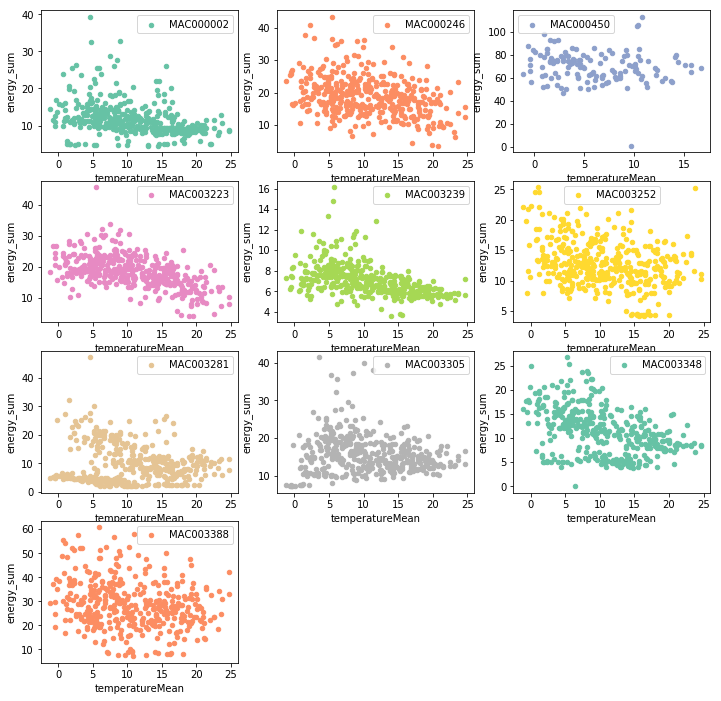

In [37]:
fig,ax=plt.subplots(figsize=(12,12))
palette=sns.color_palette("Set2", len(list(dict_result.keys())))
for i,household in enumerate(dict_result):
    ax=plt.subplot(4,3,i+1)
    dict_result[household].plot(ax=ax,x="temperatureMean",y=('energy_sum'),kind="scatter",color=palette[i],label=household)
plt.legend()
plt.show()

In [38]:
block_daily.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
81,MAC000002,2013-01-01,0.1925,0.225000,0.886,48,0.164066,10.800,0.076
82,MAC000002,2013-01-02,0.2365,0.277083,1.078,48,0.189625,13.300,0.073
83,MAC000002,2013-01-03,0.1955,0.209875,1.098,48,0.154632,10.074,0.075
84,MAC000002,2013-01-04,0.1815,0.205354,0.662,48,0.132950,9.857,0.072
85,MAC000002,2013-01-05,0.1975,0.232729,1.181,48,0.186772,11.171,0.075


In [39]:
block_daily.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min'],
      dtype='object')

## merging with holidays data set

In [40]:
file1 = 'uk_bank_holidays.csv'
PATH_holiday='data/smartmeters/'
holiday  = pd.read_csv(PATH_holiday+file1)

In [41]:
holiday.head()

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [42]:
daily_holiday = pd.merge(left=block_daily,right=holiday, how='left', left_on='day', right_on='Bank holidays')

In [43]:
daily_holiday.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Bank holidays,Type
0,MAC000002,2013-01-01,0.1925,0.225000,0.886,48,0.164066,10.800,0.076,2013-01-01,New Year?s Day
1,MAC000002,2013-01-02,0.2365,0.277083,1.078,48,0.189625,13.300,0.073,NaN,NaN
2,MAC000002,2013-01-03,0.1955,0.209875,1.098,48,0.154632,10.074,0.075,NaN,NaN
3,MAC000002,2013-01-04,0.1815,0.205354,0.662,48,0.132950,9.857,0.072,2013-01-04,Easter Monday
4,MAC000002,2013-01-05,0.1975,0.232729,1.181,48,0.186772,11.171,0.075,NaN,NaN


# ## merging with weather data

In [44]:
daily_holiday_weather = pd.merge(left=daily_holiday,right=df_weather_daily, how='left', left_on='day', right_on='day')

In [45]:
daily_holiday_weather.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Bank holidays,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,MAC000002,2013-01-01,0.1925,0.225000,0.886,48,0.164066,10.800,0.076,2013-01-01,...,1/1/2013 8:07,1/1/2013 8:00,1/1/2013 11:00,Partly cloudy throughout the day.,1/1/2013 19:00,0.23,1/1/2013 23:00,1/1/2013 19:00,0.63,5.400
1,MAC000002,2013-01-02,0.2365,0.277083,1.078,48,0.189625,13.300,0.073,NaN,...,1/2/2013 8:07,1/2/2013 19:00,1/2/2013 12:00,Mostly cloudy throughout the day.,1/3/2013 7:00,0.23,1/2/2013 22:00,1/3/2013 7:00,0.66,7.065
2,MAC000002,2013-01-03,0.1955,0.209875,1.098,48,0.154632,10.074,0.075,NaN,...,1/3/2013 8:07,1/3/2013 13:00,1/3/2013 11:00,Mostly cloudy throughout the day.,1/4/2013 7:00,7.07,1/3/2013 13:00,1/4/2013 6:00,0.70,10.530
3,MAC000002,2013-01-04,0.1815,0.205354,0.662,48,0.132950,9.857,0.072,2013-01-04,...,1/4/2013 8:06,1/4/2013 15:00,1/4/2013 11:00,Mostly cloudy throughout the day.,1/5/2013 2:00,5.70,1/4/2013 0:00,1/4/2013 23:00,0.73,9.480
4,MAC000002,2013-01-05,0.1975,0.232729,1.181,48,0.186772,11.171,0.075,NaN,...,1/5/2013 8:06,1/5/2013 14:00,1/5/2013 12:00,Mostly cloudy until evening.,1/6/2013 3:00,5.76,1/5/2013 14:00,1/6/2013 4:00,0.77,9.250


In [46]:
daily_holiday_weather.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min',
       'Bank holidays', 'Type', 'temperatureMax', 'temperatureMaxTime',
       'windBearing', 'icon', 'dewPoint', 'temperatureMinTime', 'cloudCover',
       'windSpeed', 'pressure', 'apparentTemperatureMinTime',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureMax', 'uvIndex', 'time', 'sunsetTime',
       'temperatureLow', 'temperatureMin', 'temperatureHigh', 'sunriseTime',
       'temperatureHighTime', 'uvIndexTime', 'summary', 'temperatureLowTime',
       'apparentTemperatureMin', 'apparentTemperatureMaxTime',
       'apparentTemperatureLowTime', 'moonPhase', 'temperatureMean'],
      dtype='object')

In [47]:
daily_holiday_weather['Bank holidays'] .fillna('noholiday', inplace=True); 
daily_holiday_weather.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Bank holidays,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,MAC000002,2013-01-01,0.1925,0.225000,0.886,48,0.164066,10.800,0.076,2013-01-01,...,1/1/2013 8:07,1/1/2013 8:00,1/1/2013 11:00,Partly cloudy throughout the day.,1/1/2013 19:00,0.23,1/1/2013 23:00,1/1/2013 19:00,0.63,5.400
1,MAC000002,2013-01-02,0.2365,0.277083,1.078,48,0.189625,13.300,0.073,noholiday,...,1/2/2013 8:07,1/2/2013 19:00,1/2/2013 12:00,Mostly cloudy throughout the day.,1/3/2013 7:00,0.23,1/2/2013 22:00,1/3/2013 7:00,0.66,7.065
2,MAC000002,2013-01-03,0.1955,0.209875,1.098,48,0.154632,10.074,0.075,noholiday,...,1/3/2013 8:07,1/3/2013 13:00,1/3/2013 11:00,Mostly cloudy throughout the day.,1/4/2013 7:00,7.07,1/3/2013 13:00,1/4/2013 6:00,0.70,10.530
3,MAC000002,2013-01-04,0.1815,0.205354,0.662,48,0.132950,9.857,0.072,2013-01-04,...,1/4/2013 8:06,1/4/2013 15:00,1/4/2013 11:00,Mostly cloudy throughout the day.,1/5/2013 2:00,5.70,1/4/2013 0:00,1/4/2013 23:00,0.73,9.480
4,MAC000002,2013-01-05,0.1975,0.232729,1.181,48,0.186772,11.171,0.075,noholiday,...,1/5/2013 8:06,1/5/2013 14:00,1/5/2013 12:00,Mostly cloudy until evening.,1/6/2013 3:00,5.76,1/5/2013 14:00,1/6/2013 4:00,0.77,9.250


In [48]:
daily_holiday_weather['Bank holidays']= daily_holiday_weather['Bank holidays']!='noholiday'
daily_holiday_weather.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Bank holidays,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,MAC000002,2013-01-01,0.1925,0.225000,0.886,48,0.164066,10.800,0.076,True,...,1/1/2013 8:07,1/1/2013 8:00,1/1/2013 11:00,Partly cloudy throughout the day.,1/1/2013 19:00,0.23,1/1/2013 23:00,1/1/2013 19:00,0.63,5.400
1,MAC000002,2013-01-02,0.2365,0.277083,1.078,48,0.189625,13.300,0.073,False,...,1/2/2013 8:07,1/2/2013 19:00,1/2/2013 12:00,Mostly cloudy throughout the day.,1/3/2013 7:00,0.23,1/2/2013 22:00,1/3/2013 7:00,0.66,7.065
2,MAC000002,2013-01-03,0.1955,0.209875,1.098,48,0.154632,10.074,0.075,False,...,1/3/2013 8:07,1/3/2013 13:00,1/3/2013 11:00,Mostly cloudy throughout the day.,1/4/2013 7:00,7.07,1/3/2013 13:00,1/4/2013 6:00,0.70,10.530
3,MAC000002,2013-01-04,0.1815,0.205354,0.662,48,0.132950,9.857,0.072,True,...,1/4/2013 8:06,1/4/2013 15:00,1/4/2013 11:00,Mostly cloudy throughout the day.,1/5/2013 2:00,5.70,1/4/2013 0:00,1/4/2013 23:00,0.73,9.480
4,MAC000002,2013-01-05,0.1975,0.232729,1.181,48,0.186772,11.171,0.075,False,...,1/5/2013 8:06,1/5/2013 14:00,1/5/2013 12:00,Mostly cloudy until evening.,1/6/2013 3:00,5.76,1/5/2013 14:00,1/6/2013 4:00,0.77,9.250


In [49]:
daily_holiday_weather['day'] = pd.to_datetime(daily_holiday_weather['day'], format='%Y-%m-%d')

In [105]:
#agg_holiday_weather['day'].unique

In [58]:
#daily_holiday_weather.plot.line(x = 'day', y = 'energy_sum',  figsize=(18,9), linewidth=5, fontsize=20)
#plt.show()

In [59]:
#agg_holiday_weather.plot.line(x = 'day', y = 'energy_mean',  figsize=(18,9), linewidth=5, fontsize=20)
#plt.show()

In [50]:
add_datepart(daily_holiday_weather, "day", drop=False)

In [51]:
daily_holiday_weather.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min',
       'Bank holidays', 'Type', 'temperatureMax', 'temperatureMaxTime',
       'windBearing', 'icon', 'dewPoint', 'temperatureMinTime', 'cloudCover',
       'windSpeed', 'pressure', 'apparentTemperatureMinTime',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureMax', 'uvIndex', 'time', 'sunsetTime',
       'temperatureLow', 'temperatureMin', 'temperatureHigh', 'sunriseTime',
       'temperatureHighTime', 'uvIndexTime', 'summary', 'temperatureLowTime',
       'apparentTemperatureMin', 'apparentTemperatureMaxTime',
       'apparentTemperatureLowTime', 'moonPhase', 'temperatureMean', 'dayYear',
       'dayMonth', 'dayWeek', 'dayDay', 'dayDayofweek', 'dayDayofyear',
       'dayIs_month_end', 'dayIs_month_start', 'dayIs_quarter_end',
       'dayI

In [39]:
#df=agg_holiday_weather
#date = df['day']

In [52]:
daily_holiday_weather.head(2)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Bank holidays,...,dayDay,dayDayofweek,dayDayofyear,dayIs_month_end,dayIs_month_start,dayIs_quarter_end,dayIs_quarter_start,dayIs_year_end,dayIs_year_start,dayElapsed
0,MAC000002,2013-01-01,0.1925,0.225000,0.886,48,0.164066,10.8,0.076,True,...,1,1,1,False,True,False,True,False,True,1356998400
1,MAC000002,2013-01-02,0.2365,0.277083,1.078,48,0.189625,13.3,0.073,False,...,2,2,2,False,False,False,False,False,False,1357084800


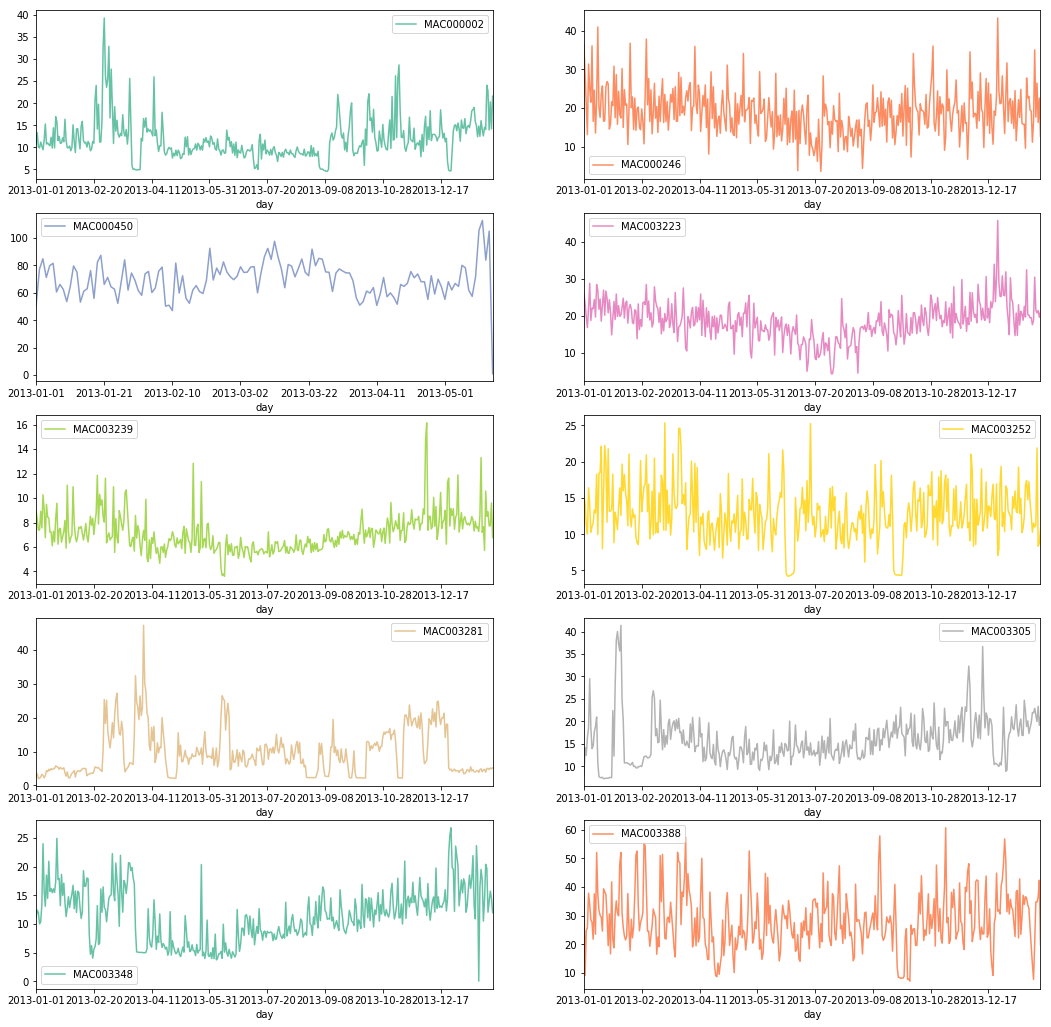

In [86]:
fig,ax=plt.subplots(figsize=(18,18))
palette=sns.color_palette("Set2", len(list(dict_result.keys())))
for i,household in enumerate(dict_result):
    ax=plt.subplot(5,2,i+1)
    dict_result[household].plot.line(ax=ax,x="day",y=('energy_sum'),color=palette[i],label=household)
    
plt.legend()
plt.show()

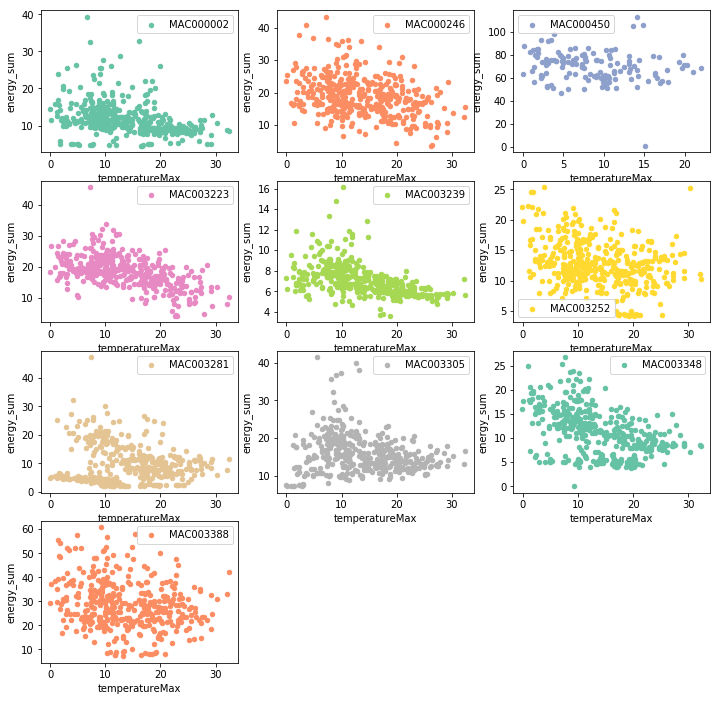

In [53]:
fig,ax=plt.subplots(figsize=(12,12))
palette=sns.color_palette("Set2", len(list(dict_result.keys())))
for i,household in enumerate(dict_result):
    ax=plt.subplot(4,3,i+1)
    dict_result[household].plot(ax=ax,x="temperatureMax",y=('energy_sum'),kind="scatter",color=palette[i],label=household)
plt.legend()
plt.show()

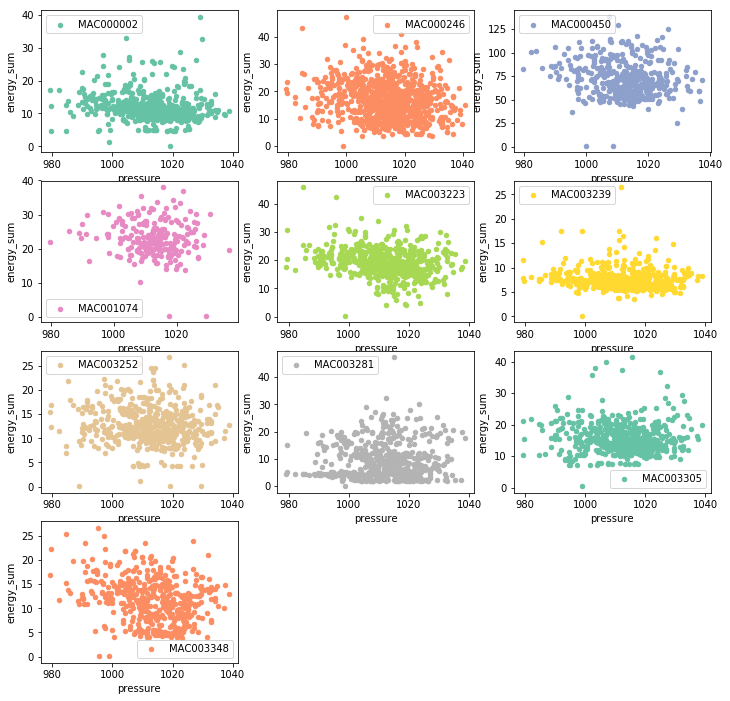

In [67]:
fig,ax=plt.subplots(figsize=(12,12))
palette=sns.color_palette("Set2", len(list(dict_result.keys())))
for i,household in enumerate(dict_result):
    ax=plt.subplot(4,3,i+1)
    dict_result[household].plot(ax=ax,x="pressure",y=('energy_sum'),kind="scatter",color=palette[i],label=household)
plt.legend()
plt.show()

In [54]:
daily_holiday_weather['energy_sum'].corr(daily_holiday_weather['humidity'])

0.083232319629010523

In [55]:
daily_holiday_weather['energy_sum'].corr(daily_holiday_weather['pressure'])

-0.044110505186160595

In [56]:
daily_holiday_weather['energy_sum'].corr(daily_holiday_weather['temperatureMean'])

-0.16417129572059602

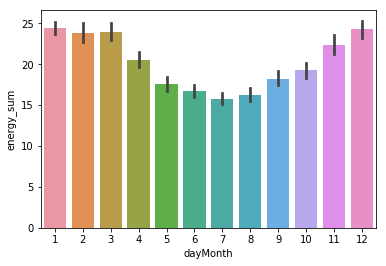

In [57]:
sns.barplot(x = 'dayMonth', y = 'energy_sum', data = daily_holiday_weather)
plt.show()

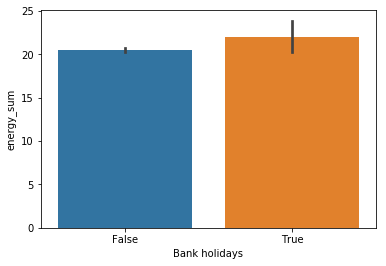

In [58]:
sns.barplot(x = 'Bank holidays', y = 'energy_sum', data = daily_holiday_weather)
plt.show()

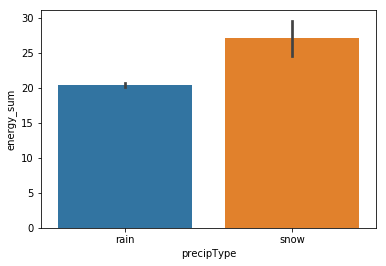

In [59]:
sns.barplot(x = 'precipType', y = 'energy_sum', data = daily_holiday_weather)
plt.show()

In [60]:
final_data  = daily_holiday_weather.drop(['dayElapsed'], axis=1)

In [61]:
final_data.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min',
       'Bank holidays', 'Type', 'temperatureMax', 'temperatureMaxTime',
       'windBearing', 'icon', 'dewPoint', 'temperatureMinTime', 'cloudCover',
       'windSpeed', 'pressure', 'apparentTemperatureMinTime',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureMax', 'uvIndex', 'time', 'sunsetTime',
       'temperatureLow', 'temperatureMin', 'temperatureHigh', 'sunriseTime',
       'temperatureHighTime', 'uvIndexTime', 'summary', 'temperatureLowTime',
       'apparentTemperatureMin', 'apparentTemperatureMaxTime',
       'apparentTemperatureLowTime', 'moonPhase', 'temperatureMean', 'dayYear',
       'dayMonth', 'dayWeek', 'dayDay', 'dayDayofweek', 'dayDayofyear',
       'dayIs_month_end', 'dayIs_month_start', 'dayIs_quarter_end',
       'dayI

In [62]:
final_data1 = final_data.drop(['LCLid'], axis = 1)

In [63]:
final_data1=final_data1.sort_values(["day"])

In [64]:
cat_vars = ['Bank holidays','precipType', 'dayMonth', 'dayDayofyear','dayYear','dayWeek', 'dayDay', 'dayDayofweek',
       'dayIs_month_end', 'dayIs_month_start',
       'dayIs_quarter_end', 'dayIs_quarter_start', 'dayIs_year_end',
       'dayIs_year_start']

contin_vars = ['temperatureMax','windBearing', 'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh','visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'temperatureMean']


In [65]:
for v in cat_vars: final_data1[v] = final_data1[v].astype('category').cat.as_ordered()
for v in contin_vars: final_data1[v] = final_data1[v].astype('float32')
dep = 'energy_sum'
final_dataset = final_data1[cat_vars+contin_vars+[dep, 'day']]

In [66]:

final_dataset = final_dataset.set_index("day")

final_dataset.index = pd.to_datetime(final_dataset.index,format='%Y/%m/%d')

In [67]:
final_dataset.head(2)

,Bank holidays,precipType,dayMonth,dayDayofyear,dayYear,dayWeek,dayDay,dayDayofweek,dayIs_month_end,dayIs_month_start,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,temperatureMean,energy_sum
day,,,,,,,,,,,,,,,,,,,,,
2013-01-01,True,rain,1,1,2013,1,1,1,False,True,...,1.68,4.38,1.0,4.42,3.31,5.76,0.23,0.63,5.4,10.800
2013-01-01,True,rain,1,1,2013,1,1,1,False,True,...,1.68,4.38,1.0,4.42,3.31,5.76,0.23,0.63,5.4,7.919


In [68]:
df1, y, nas, mapper = proc_df(final_dataset, 'energy_sum', do_scale=True)
yl = np.log(y)

In [69]:
n=len(final_dataset)

In [70]:
train_ratio = 0.75
train_size = int(n * train_ratio); train_size
val_idx = list(range(train_size, len(df1)))

In [71]:
train_size

13888

In [72]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [73]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df1, yl, cat_flds=cat_vars, bs=128) 

In [74]:
cat_sz = [(c, len(final_dataset[c].cat.categories)+1) for c in cat_vars]

In [75]:
## the above graph shows when the avg temperature is low , energy is consumed maximum

In [76]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [105]:
m = md.get_learner(emb_szs, len(df1.columns)-len(cat_vars),
                   0.20, 1, [1000,500], [0.50,0.50], y_range=y_range)
lr = 1e-4

In [106]:
m.lr_find()

A Jupyter Widget

[ 0.       2.1892   8.54499]                                 



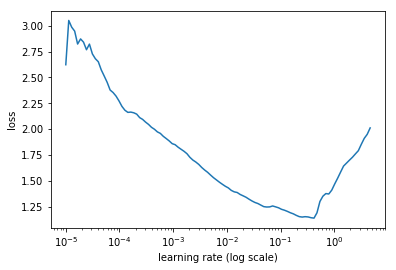

In [107]:
m.sched.plot(n_skip=0)
plt.show()

In [118]:
m = md.get_learner(emb_szs, len(df1.columns)-len(cat_vars),
                   0.40, 1, [1000,500], [0.40,0.30], y_range=y_range)
lr = 1e-4

In [119]:
m.fit(lr, 5, metrics=[exp_rmspe])

A Jupyter Widget

[ 0.       1.06757  0.72808  3.19641]                       
[ 1.       0.87944  0.70055  3.72539]                         
[ 2.       0.79901  0.6995   3.7955 ]                        
[ 3.       0.75342  0.68948  3.79541]                        
[ 4.       0.70503  0.68322  3.60018]                        



In [120]:
m.fit(lr, 1, metrics=[exp_rmspe], cycle_len=1)

A Jupyter Widget

[ 0.       0.68608  0.68152  3.83602]                        



In [124]:
m.fit(lr, 4, metrics=[exp_rmspe], cycle_len=3)

A Jupyter Widget

[ 0.       0.64721  0.66008  3.94059]                        
[ 1.       0.64619  0.6611   3.97144]                         
[ 2.       0.63685  0.65937  3.92936]                        
[ 3.       0.62931  0.65496  3.83528]                        
[ 4.       0.62958  0.65818  3.93078]                        
[ 5.       0.6354   0.65677  3.90679]                         
[ 6.       0.64618  0.64689  3.81154]                        
[ 7.       0.63078  0.64107  3.80834]                        
[ 8.       0.62363  0.64135  3.83983]                         
[ 9.       0.63827  0.63645  3.8576 ]                        
[ 10.        0.62812   0.63899   3.86664]                    
[ 11.        0.6297    0.63892   3.8513 ]                    



# Random forest

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
#((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df1.values, yl)

In [128]:
len(df1)

18518

In [134]:
#df1[18000:]

In [135]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()


n_trn = 17000
n_val = len(df1)-n_trn
#raw_train, raw_valid = split_vals(df1, n_trn)
trn, val = split_vals(df1, n_trn)
y_trn, y_val = split_vals(yl,n_trn)
#_

In [138]:
m_rf = RandomForestRegressor(n_estimators=25, max_features=0.75, min_samples_leaf=20,
                          n_jobs=-1, oob_score=True)
m_rf.fit(trn, y_trn);

adding variables like month, year, day of week, day of year etc from day variable

In [139]:
preds = m_rf.predict(val)
m_rf.score(trn, y_trn), m_rf.score(val, y_val), m_rf.oob_score_, exp_rmspe(preds, y_val)

(0.055685792914554222,
 -0.0013013219651152317,
 0.012191467511826093,
 8.377839826533215)